In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk  
from textblob import TextBlob
import plotly.express as px

In [2]:
data=pd.read_csv("C:\\Users\\Lenovo\\Downloads\\sentimentdataset(1).csv")

In [3]:
data.head(5)

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [4]:
#DATA CLEANING
#To clean unwanted columns
data=data.drop(columns=['Unnamed: 0.1','Unnamed: 0'])

In [5]:
data.head(5)

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [6]:
data.isnull().sum()

Text         0
Sentiment    0
Timestamp    0
User         0
Platform     0
Hashtags     0
Retweets     0
Likes        0
Country      0
Year         0
Month        0
Day          0
Hour         0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Text       732 non-null    object 
 1   Sentiment  732 non-null    object 
 2   Timestamp  732 non-null    object 
 3   User       732 non-null    object 
 4   Platform   732 non-null    object 
 5   Hashtags   732 non-null    object 
 6   Retweets   732 non-null    float64
 7   Likes      732 non-null    float64
 8   Country    732 non-null    object 
 9   Year       732 non-null    int64  
 10  Month      732 non-null    int64  
 11  Day        732 non-null    int64  
 12  Hour       732 non-null    int64  
dtypes: float64(2), int64(4), object(7)
memory usage: 74.5+ KB


In [8]:
#To change the Dtype of Timestamp into Datetime
data['Timestamp']=pd.to_datetime(data['Timestamp'])

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Text       732 non-null    object        
 1   Sentiment  732 non-null    object        
 2   Timestamp  732 non-null    datetime64[ns]
 3   User       732 non-null    object        
 4   Platform   732 non-null    object        
 5   Hashtags   732 non-null    object        
 6   Retweets   732 non-null    float64       
 7   Likes      732 non-null    float64       
 8   Country    732 non-null    object        
 9   Year       732 non-null    int64         
 10  Month      732 non-null    int64         
 11  Day        732 non-null    int64         
 12  Hour       732 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(6)
memory usage: 74.5+ KB


In [10]:
#Counting unique values from important categorical columns
Sentiment_count=data['Sentiment'].value_counts()
Platform_count=data['Platform'].value_counts()
Country_count=data['Country'].value_counts()
print(Sentiment_count)
print(Platform_count)
print(Country_count)

Sentiment
 Positive           44
 Joy                42
 Excitement         32
 Neutral            14
 Contentment        14
                    ..
 Adrenaline          1
 Harmony             1
 ArtisticBurst       1
 Radiance            1
 Elegance            1
Name: count, Length: 279, dtype: int64
Platform
 Instagram     258
 Facebook      231
 Twitter       128
 Twitter       115
Name: count, dtype: int64
Country
 USA               59
 USA               55
 UK                49
 Canada            44
 Australia         41
                   ..
 Netherlands        1
 USA                1
 Germany            1
 France             1
 USA                1
Name: count, Length: 115, dtype: int64


In [11]:
#Removing & Trailing whitespaces in categorical columns.
data['Platform']=data['Platform'].str.strip()
data['Country']=data['Country'].str.strip()

In [12]:
Sentiment_count=data['Sentiment'].value_counts()
Platform_count=data['Platform'].value_counts()
Country_count=data['Country'].value_counts()
print(Sentiment_count)
print(Platform_count)
print(Country_count)

Sentiment
 Positive           44
 Joy                42
 Excitement         32
 Neutral            14
 Contentment        14
                    ..
 Adrenaline          1
 Harmony             1
 ArtisticBurst       1
 Radiance            1
 Elegance            1
Name: count, Length: 279, dtype: int64
Platform
Instagram    258
Twitter      243
Facebook     231
Name: count, dtype: int64
Country
USA               188
UK                143
Canada            135
Australia          75
India              70
Brazil             17
France             16
Japan              15
Germany            14
Italy              11
Spain               6
South Africa        6
Greece              5
Netherlands         4
Switzerland         3
Portugal            2
Austria             2
Belgium             2
Denmark             2
Czech Republic      2
Sweden              2
Colombia            1
Scotland            1
Kenya               1
Jamaica             1
Ireland             1
China               1
Norway    

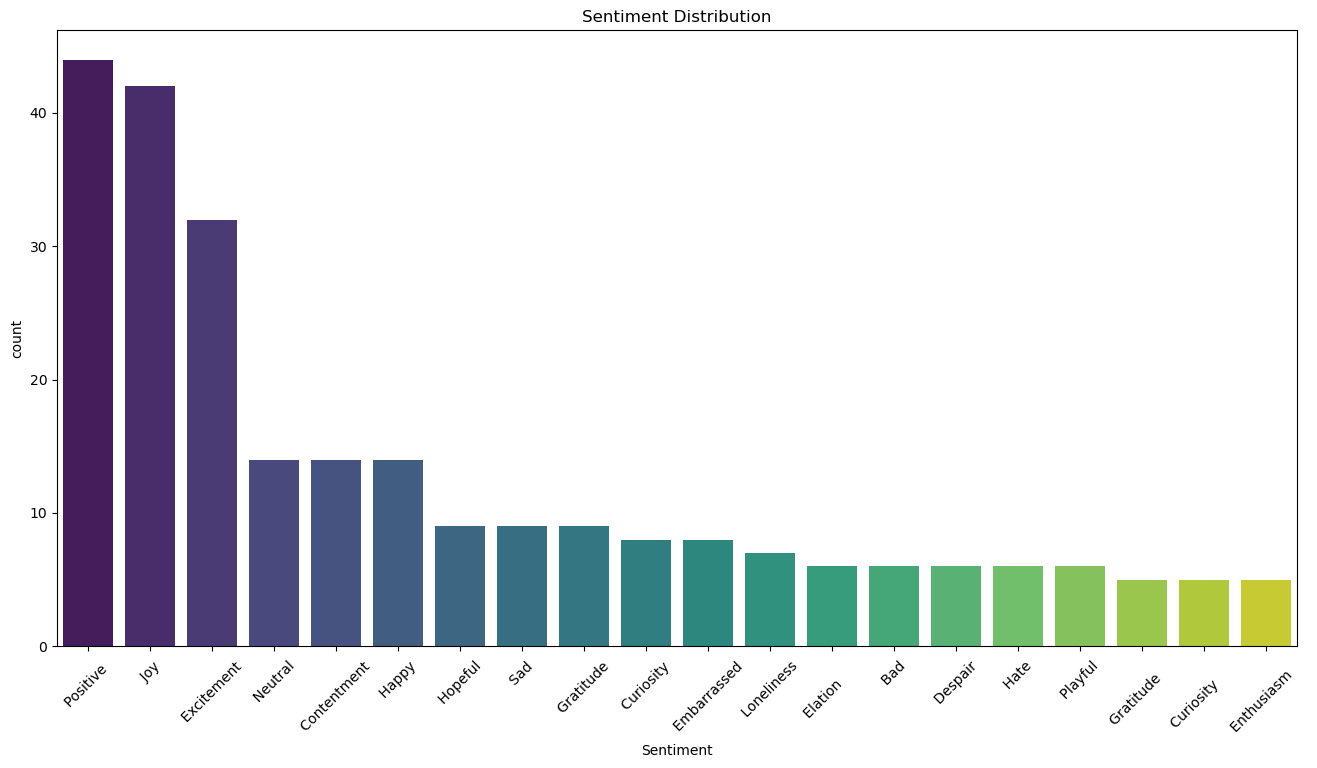

In [13]:
#UNIVRIATE DATA ANALYSIS
#Sentimant Distribution
plt.figure(figsize=(16,8))
sns.countplot(data=data,x='Sentiment',palette='viridis',order=data['Sentiment'].value_counts().index[:20]) #most frequent sentiment is being analyses
plt.title('Sentiment Distribution')
plt.xlabel=('Sentiment')
plt.xticks(rotation=45 )
plt.show()

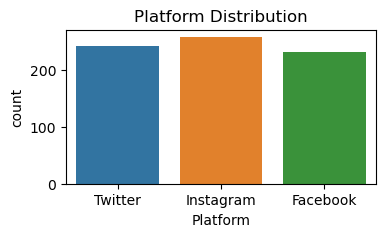

In [14]:
#Platform Distribution
plt.figure(figsize=(4,2))
sns.countplot(data=data,x='Platform')
plt.title('Platform Distribution')
plt.xlabel=('Platform')
plt.show()

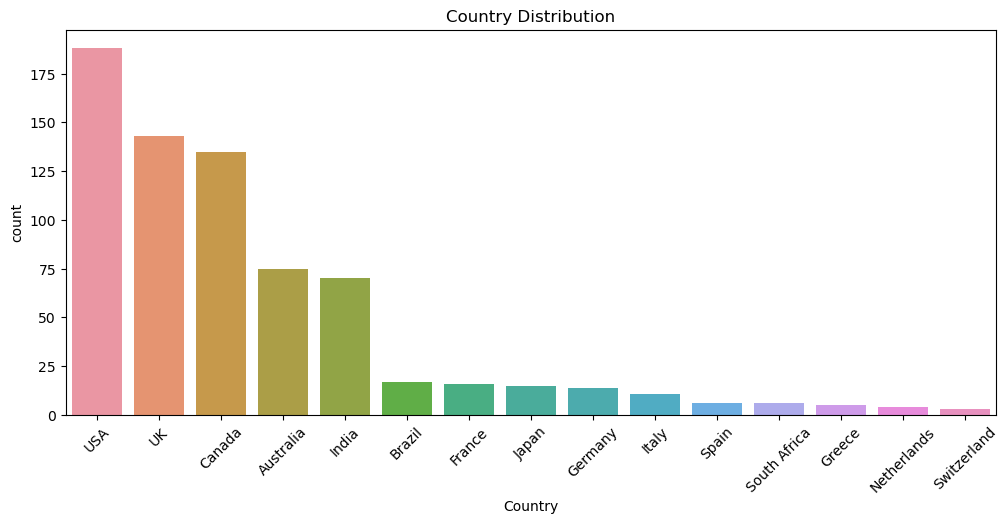

In [15]:
#Country Distribution
plt.figure(figsize=(12,5))
sns.countplot(data=data,x='Country',order=data['Country'].value_counts().index[:15]) #Top 15 most frequent region
plt.title('Country Distribution')
plt.xlabel=('Country')
plt.xticks(rotation=45)
plt.show()

In [16]:
#Sentiment Analysis
example=data['Text'][50]
print(example)

 Starting a new fitness challenge tomorrow! 💪     


In [17]:
#Tokenize
tokens=nltk.word_tokenize(example)
tokens[:10]

['Starting', 'a', 'new', 'fitness', 'challenge', 'tomorrow', '!', '💪']

In [18]:
tagged=nltk.pos_tag(tokens)
tagged[:10]

[('Starting', 'VBG'),
 ('a', 'DT'),
 ('new', 'JJ'),
 ('fitness', 'NN'),
 ('challenge', 'NN'),
 ('tomorrow', 'NN'),
 ('!', '.'),
 ('💪', 'NN')]

In [19]:
entities=nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  Starting/VBG
  a/DT
  new/JJ
  fitness/NN
  challenge/NN
  tomorrow/NN
  !/.
  💪/NN)


In [20]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [21]:
sid=SentimentIntensityAnalyzer()

In [22]:
#Calculate compound sentiment scores on each step
data['VADER_COMPOUND']=data['Text'].astype(str).apply(lambda x:sid.polarity_scores(x)['compound'])
#convert score into label
def sentiment_score(score):
    if score<=0.05:
        return 'Negative'
    if score>=0.05:
        return 'Positive'
    else:
        return 'Neutral'
data['VADER_SENTIMENT']=data['VADER_COMPOUND'].apply(sentiment_score)        
    

In [23]:
data.head(5)

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,VADER_COMPOUND,VADER_SENTIMENT
0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12,0.8221,Positive
1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8,-0.4767,Negative
2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15,0.6239,Positive
3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18,0.4003,Positive
4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19,0.0000,Negative


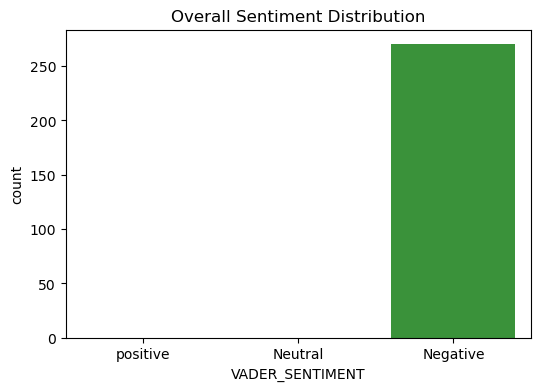

In [24]:
#Overall Sentiment Distribution
plt.figure(figsize=(6,4))
sns.countplot(data=data,x="VADER_SENTIMENT",order=['positive','Neutral','Negative'])
plt.title("Overall Sentiment Distribution")
plt.show()
              

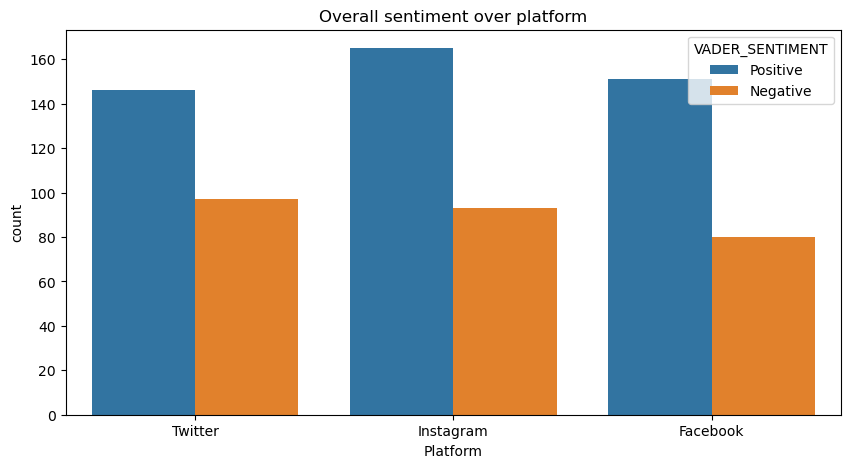

In [25]:
#Sentiment vary across platform
plt.figure(figsize=(10,5))
sns.countplot(data=data,x='Platform',hue='VADER_SENTIMENT')
plt.title('Overall sentiment over platform')
plt.show()

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


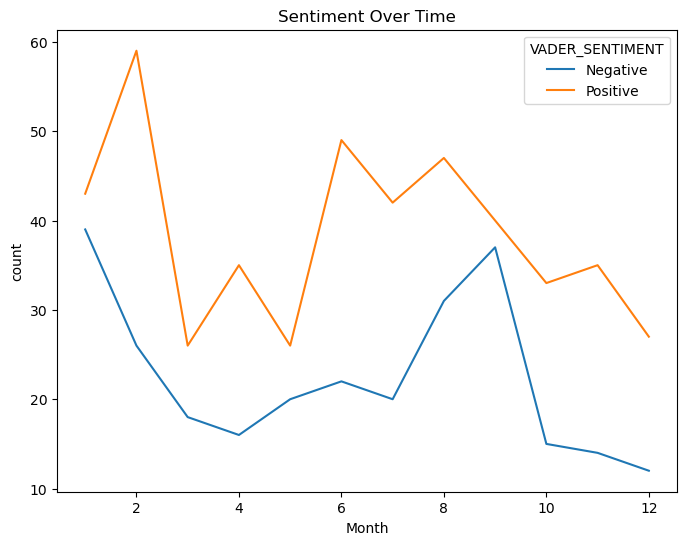

In [26]:
#Sentiment Over Time
data["Month"]=data['Timestamp'].dt.month
Time=data.groupby(['Month','VADER_SENTIMENT']).size().reset_index(name='count')
plt.figure(figsize=(8,6))
sns.lineplot(data=Time,x="Month",hue="VADER_SENTIMENT",y="count")
plt.title("Sentiment Over Time")
plt.show()

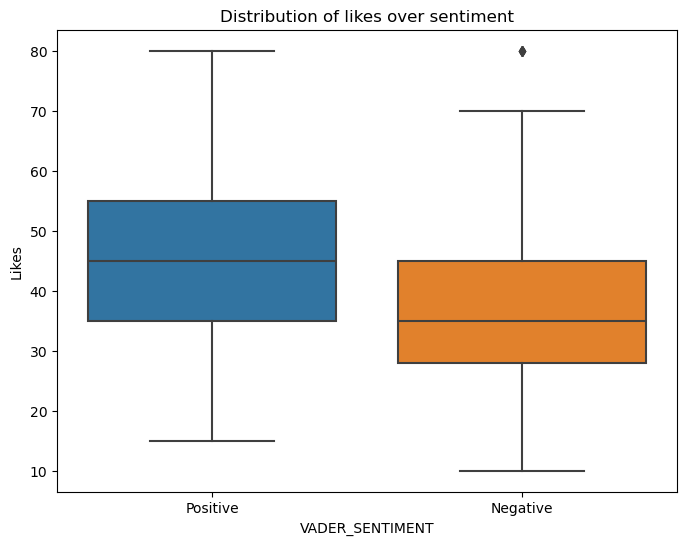

In [27]:
#User Behavior Inssights
plt.figure(figsize=(8,6))
sns.boxplot(data=data,x='VADER_SENTIMENT',y='Likes')
plt.title("Distribution of likes over sentiment")
plt.show()

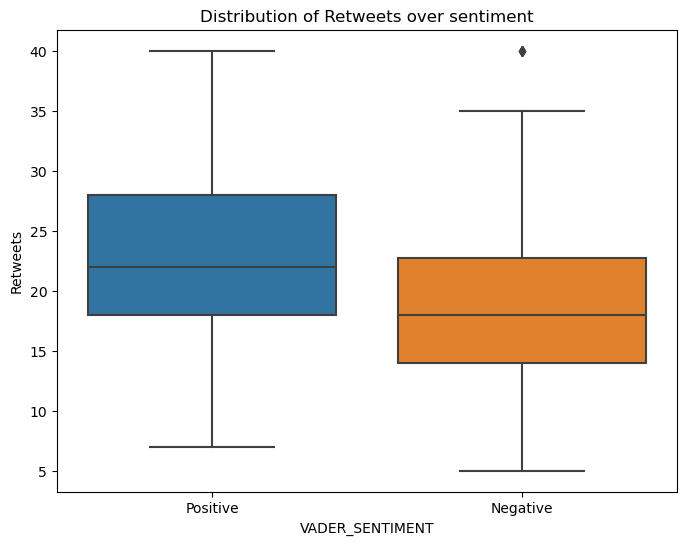

In [28]:
plt.figure(figsize=(8,6))
sns.boxplot(data=data,x='VADER_SENTIMENT',y='Retweets')
plt.title('Distribution of Retweets over sentiment')
plt.show()

In [29]:
#Platform specific Analysis
engagement=data.groupby('Platform')[['Likes','Retweets']].mean().sort_values(by='Likes',ascending=False)
print(engagement)

               Likes   Retweets
Platform                       
Instagram  45.089147  22.600775
Facebook   41.870130  20.969697
Twitter    41.559671  20.860082


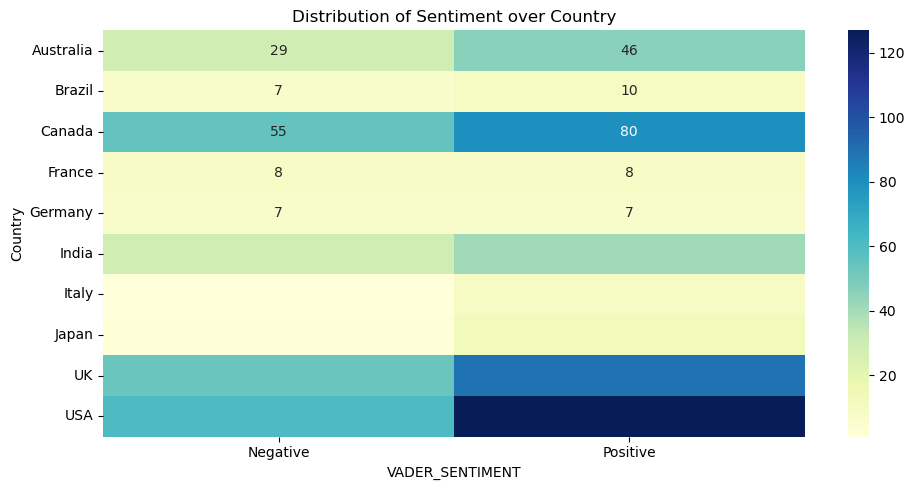

In [30]:
c1=data['Country'].value_counts().index[:10] #Top 10 frequent Countries
new_data=data[data['Country'].isin(c1) ] 
#Plotting Heatmap
heatmap_data=new_data.pivot_table(index='Country',columns='VADER_SENTIMENT',aggfunc='size',fill_value=0)
plt.figure(figsize=(10,5))
sns.heatmap(heatmap_data,annot=True,fmt='d',cmap='YlGnBu')
plt.title('Distribution of Sentiment over Country')
plt.tight_layout()
plt.show()

In [31]:
geo_engagement=data.groupby('Country')[['Likes','Retweets']].mean().sort_values(by='Likes',ascending=False).head(10)
print(geo_engagement)

                  Likes   Retweets
Country                           
South Africa  71.666667  35.833333
Belgium       70.000000  35.000000
Thailand      70.000000  35.000000
Sweden        70.000000  35.000000
Jamaica       60.000000  30.000000
Jordan        60.000000  30.000000
Portugal      55.000000  28.000000
Switzerland   55.000000  27.333333
Colombia      55.000000  28.000000
Peru          55.000000  28.000000


In [32]:
#User Identification
Top_User=data['User'].value_counts().head(10)
print(Top_User)

User
 WindWhisperer        3
 RainNurturer         3
 WinterWarmth         3
 CarnivalDreamer      3
 DawnGardener         3
 PeakConqueror        3
 FamilyGatherer       2
 GardenEnthusiast     2
 RiverNavigator       2
 LanternWanderer      2
Name: count, dtype: int64


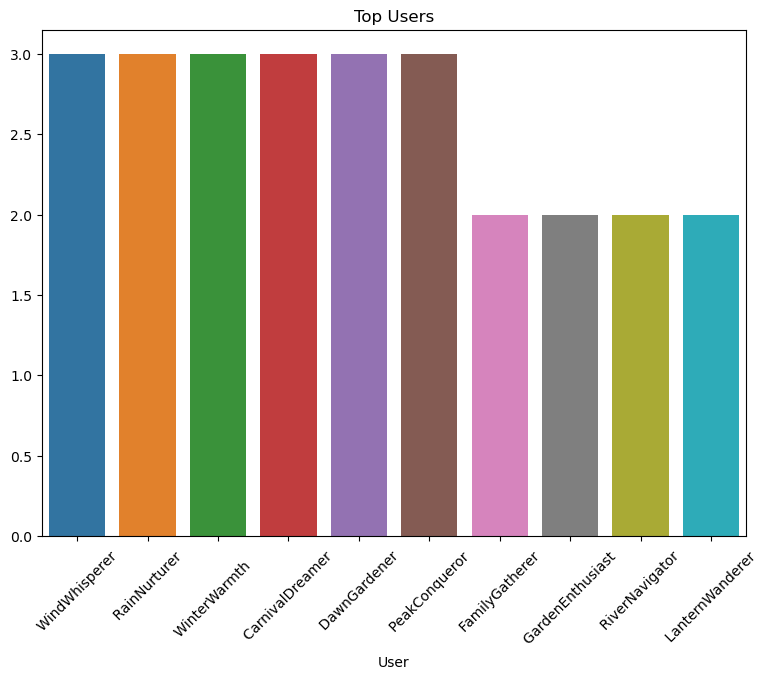

In [33]:
plt.figure(figsize=(8,6))
sns.barplot(y=Top_User.values,x=Top_User.index)
plt.title("Top Users")
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12648\959669003.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['Month']=filtered['Timestamp'].dt.strftime('%b')
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


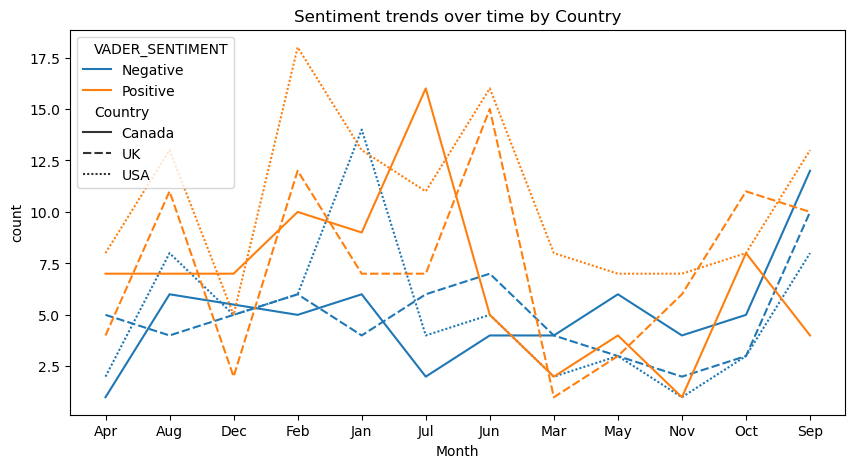

In [34]:
top_Country=data['Country'].value_counts().index[:3]
filtered=data[data['Country'].isin(top_Country)]
filtered['Month']=filtered['Timestamp'].dt.strftime('%b')
trend=filtered.groupby(['Country','Month','VADER_SENTIMENT']).size().reset_index(name='count')
#Plotting
plt.figure(figsize=(10,5))
sns.lineplot(data=trend,x='Month',y='count',hue='VADER_SENTIMENT',style='Country')
plt.title('Sentiment trends over time by Country')
plt.show()

In [35]:
from collections import Counter

In [36]:
print(data['Hashtags'].dropna().head(10))

0     #Nature #Park                            
1     #Traffic #Morning                        
2     #Fitness #Workout                        
3     #Travel #Adventure                       
4     #Cooking #Food                           
5       #Gratitude #PositiveVibes              
6     #RainyDays #Cozy                         
7      #MovieNight #MustWatch                  
8      #Politics #Debate                       
9      #Summer #BeachDays                      
Name: Hashtags, dtype: object


In [37]:
hashtags=data['Hashtags'].dropna().str.lower().str.split()
flat_hashtags=[]
for sublist in hashtags:
    for tag in sublist:
        flat_hashtags.append(tag)

In [38]:
top_hashtags=Counter(flat_hashtags).most_common(20)
tag,counts=zip(*top_hashtags)

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


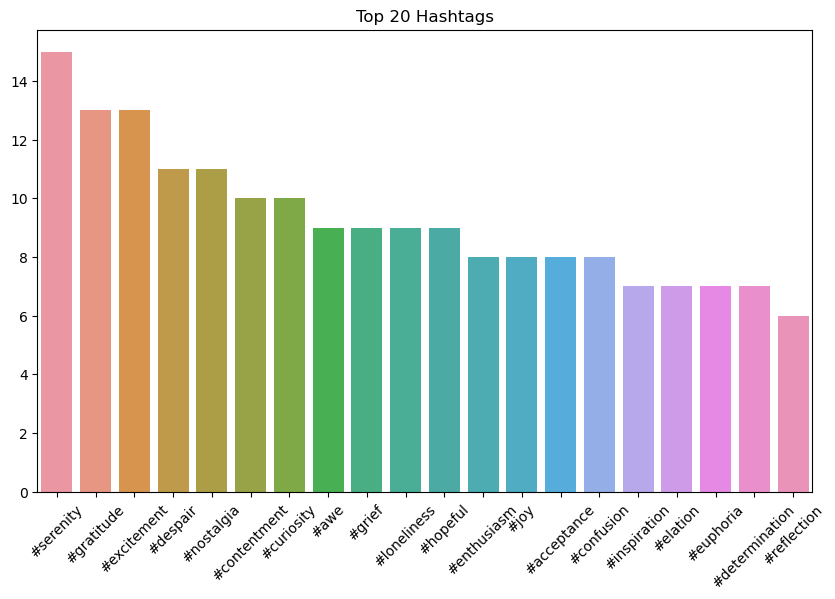

In [40]:
plt.figure(figsize=(10,6))
sns.barplot(x=list(tag),y=list(counts))
plt.title("Top 20 Hashtags")
plt.xticks(rotation=45)
plt.show()